# Import Libraries

Rreference:
- https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
# Loading the dataset
dataset = pd.read_csv('Data/DC_Prop_Condominium_Clustering.csv', index_col= 'Unnamed: 0')
dataset = dataset.reset_index()

In [3]:
dataset.shape

(40316, 20)

In [4]:
dataset.head()

,index,BATHRM,HF_BATHRM,HEAT,AC,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,QUALIFIED,SALE_NUM,FIREPLACES,USECODE,LANDAREA,LIVING_GBA,WARD,SalevYB,SalevYI
0,0,2,0,2,1,4,2,1911.0,2016.0,1919,599900.0,0,2,0,16,716,1084.0,0,105.0,97
1,1,2,0,2,1,4,2,1911.0,2016.0,1919,677900.0,1,2,0,16,844,1267.0,0,106.0,98
2,2,2,0,2,1,4,2,1911.0,2016.0,1919,659900.0,1,2,0,16,763,1151.0,0,105.0,97
3,3,2,0,2,1,4,2,1911.0,2016.0,1919,645000.0,1,2,0,16,716,1080.0,0,105.0,97
4,4,2,0,2,1,4,2,1911.0,2016.0,1919,690900.0,0,2,0,16,923,1405.0,0,106.0,98


In [5]:
data = 'BATHRM', 'LANDAREA', 'YR_RMDL', 'USECODE', 'EYB', 'LIVING_GBA', 'SalevYB', 'AYB', 'PRICE'

X = dataset.loc[:2000, data].values

In [6]:
X.shape

(2001, 9)

## KMeans

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
predictions = kmeans.fit_predict(X)
# Ekstrak informasi


score_kemans_s = silhouette_score(X, kmeans.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(X, kmeans.labels_)
score_kemans_d = davies_bouldin_score(X, predictions)
score_kemans_i = kmeans.inertia_
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)
print(f'Inrtia = {score_kemans_i:.4f}')

Silhouette Score: 0.6677
Calinski Harabasz Score: 4611.1489
Davies Bouldin Score: 0.4521
Inrtia = 45534235191786.5078


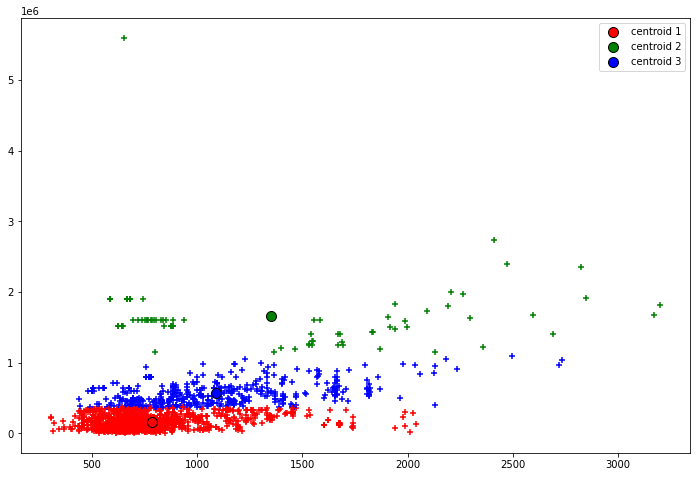

In [8]:
c_sklearn = kmeans.labels_
new_z_sklearn = kmeans.cluster_centers_

plt.figure(figsize=(12,8))
for i in range(len(c_sklearn)):
    if c_sklearn[i] == 0:
        plt.scatter(X[i,5], X[i,8], c='r', marker='+')
    elif c_sklearn[i] == 1:
        plt.scatter(X[i,5], X[i,8], c='g', marker='+')
    else:
        plt.scatter(X[i,5], X[i,8], c='b', marker='+')

plt.scatter(new_z_sklearn[0,5], new_z_sklearn[0,8], c='r', edgecolor='k', s=100, label='centroid 1')
plt.scatter(new_z_sklearn[1,5], new_z_sklearn[1,8], c='g', edgecolor='k', s=100, label='centroid 2')
plt.scatter(new_z_sklearn[2,5], new_z_sklearn[2,8], c='b', edgecolor='k', s=100, label='centroid 3')


plt.legend()
plt.show()


# Hierarchical Clustering

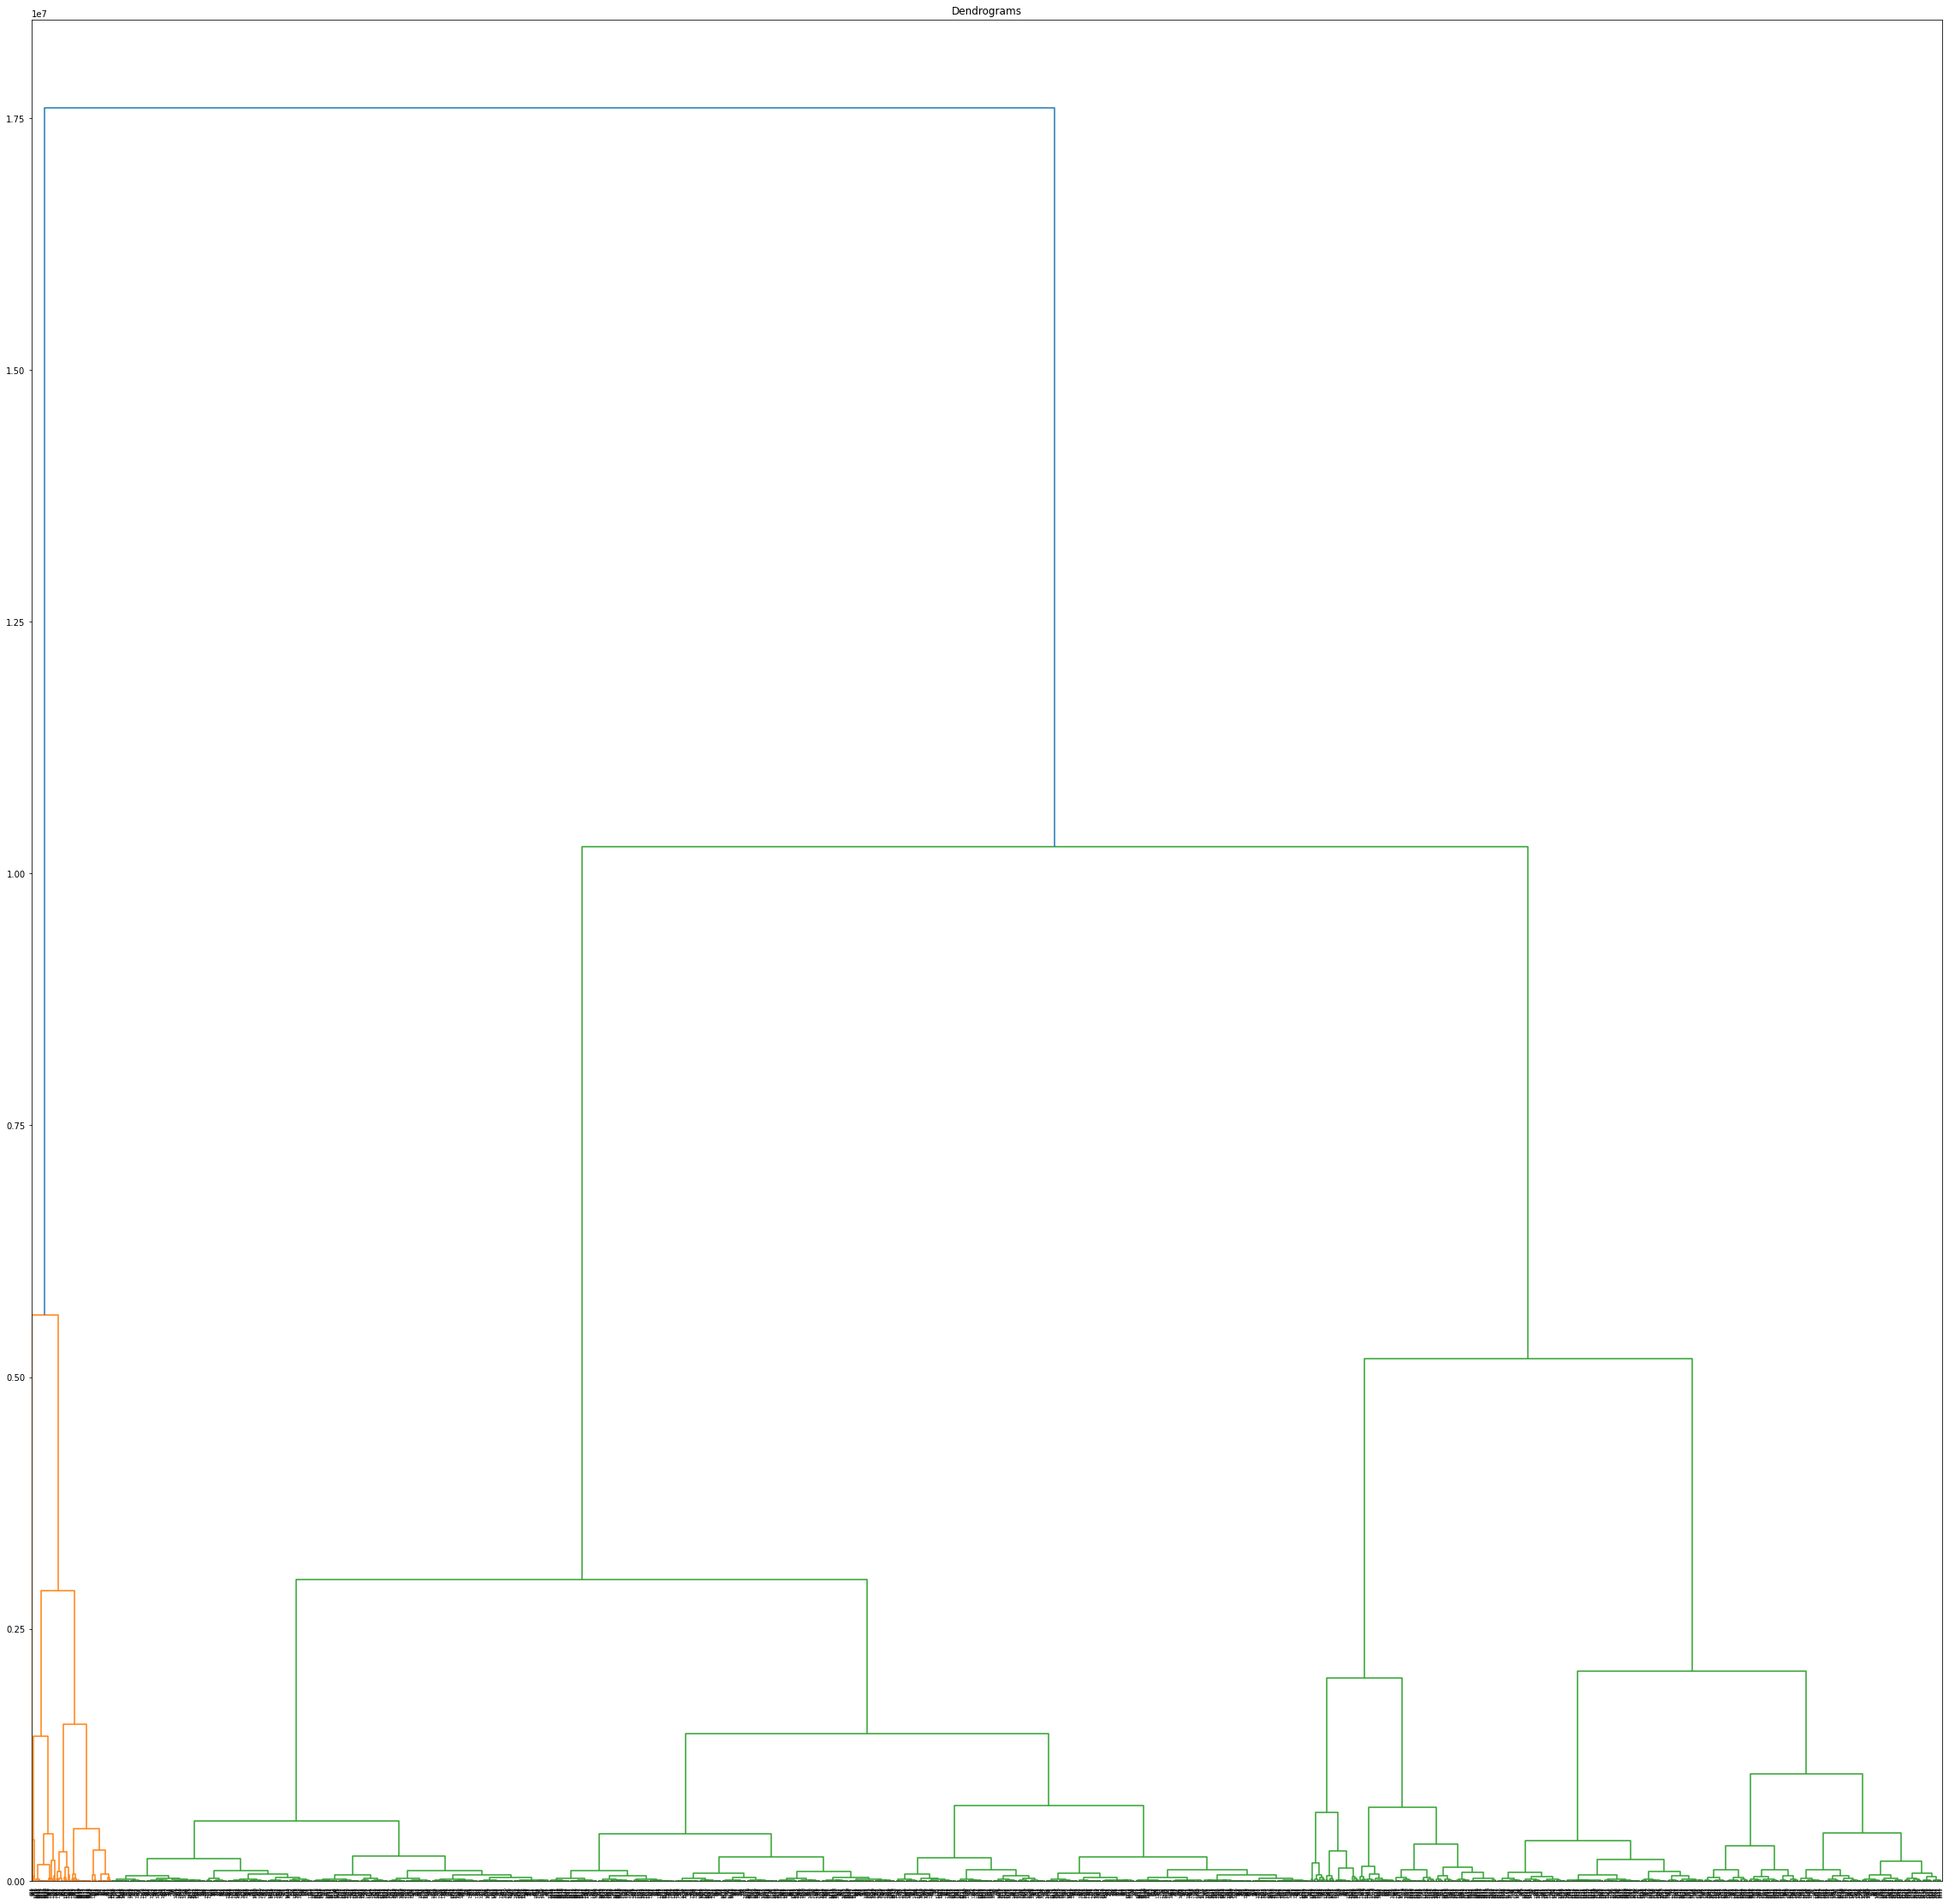

In [30]:
# Dendrogram for Hierarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(40,40))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [33]:
# Agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
# define the model
model = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat = model.fit(X)
yhat_2 = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_AGclustering_s = silhouette_score(X, yhat.labels_, metric='euclidean')
score_AGclustering_c = calinski_harabasz_score(X, yhat.labels_)
score_AGclustering_d = davies_bouldin_score(X, yhat_2)
print('Silhouette Score: %.4f' % score_AGclustering_s)
print('Calinski Harabasz Score: %.4f' % score_AGclustering_c)
print('Davies Bouldin Score: %.4f' % score_AGclustering_d)

Silhouette Score: 0.6258
Calinski Harabasz Score: 4592.2298
Davies Bouldin Score: 0.3785


# Gaussian Mixture Modelling (GMM)

In [10]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
# define the model
model = GaussianMixture(n_components= 26,covariance_type= "full", random_state = 10)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation score
score_dbsacn_s = silhouette_score(X, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(X, yhat)
score_dbsacn_d = davies_bouldin_score(X, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: -0.5499
Calinski Harabasz Score: 374.4068
Davies Bouldin Score: 3.7613


# OTHER

In [13]:
x_df = pd.DataFrame(X, columns = data)
y_df = pd.DataFrame (predictions, columns = ['cluster'])

In [21]:
y_df.head()

,cluster
0,2
1,2
2,2
3,2
4,2


In [20]:
x_df_clust = pd.concat([x_df, y_df], axis=1, join="inner")
x_df_clust.head(15)

,BATHRM,LANDAREA,YR_RMDL,USECODE,EYB,LIVING_GBA,SalevYB,AYB,PRICE,cluster
0,2.0,716.0,2016.0,16.0,1919.0,1084.0,105.0,1911.0,599900.0,2
1,2.0,844.0,2016.0,16.0,1919.0,1267.0,106.0,1911.0,677900.0,2
2,2.0,763.0,2016.0,16.0,1919.0,1151.0,105.0,1911.0,659900.0,2
3,2.0,716.0,2016.0,16.0,1919.0,1080.0,105.0,1911.0,645000.0,2
4,2.0,923.0,2016.0,16.0,1919.0,1405.0,106.0,1911.0,690900.0,2
5,2.0,844.0,2016.0,16.0,1919.0,1278.0,105.0,1911.0,695000.0,2
6,2.0,918.0,2016.0,16.0,1919.0,1417.0,105.0,1911.0,803500.0,2
7,2.0,716.0,2016.0,16.0,1919.0,1080.0,105.0,1911.0,642900.0,2
8,2.0,923.0,2016.0,16.0,1919.0,1405.0,106.0,1911.0,765900.0,2
9,2.0,844.0,2016.0,16.0,1919.0,1278.0,105.0,1911.0,738400.0,2


In [16]:
#See Characteristic of Cluster in each variables
hasil=x_df_clust.groupby(['cluster']).agg("mean").reset_index()
hasil

,cluster,BATHRM,LANDAREA,YR_RMDL,USECODE,EYB,LIVING_GBA,SalevYB,AYB,PRICE
0,0,1.143826,917.135007,1995.893487,16.186567,1965.117368,784.931479,46.249661,1963.005427,1.638123e+05
1,1,1.707317,879.853659,2000.097561,16.085366,1968.073171,1352.280488,46.548780,1967.256098,1.658994e+06
2,2,1.597753,624.912360,1994.662921,16.474157,1967.188764,1087.959551,46.195506,1966.768539,5.674701e+05
